Dataset : Mall Customers Dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
print("Missing values:")
df.isnull().sum()

Missing values:


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

1. Implementing K-Means Clustering on Customer Segments
Task: Apply K-Means clustering to the Mall Customers dataset to segment customers based on their annual income and spending score. Visualize the resulting clusters.

In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

2. Optimal Number of Clusters: Elbow Method and Silhouette Score
Task: Use the Elbow Method and Silhouette Score to find the optimal number of clusters for the Mall Customers dataset.
Discuss the criteria for selecting the number of clusters.

Elbow Method

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

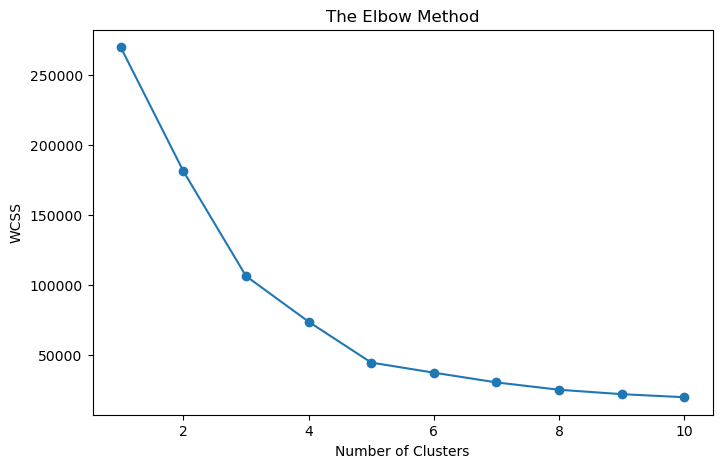

In [8]:
# Plotting the Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette Score 

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

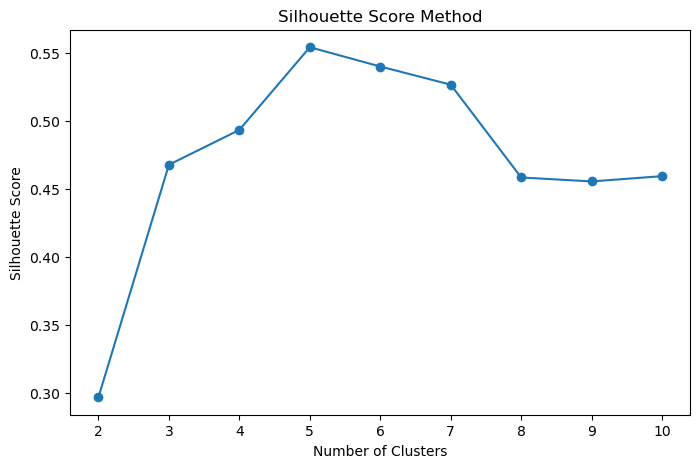

In [13]:
# Plotting the Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

3. Cluster Profiling and Insights
Task: Analyze the characteristics of the clusters formed in the Mall Customers dataset. Provide insights into the customer segments based on their spending behavior and income levels.

In [ ]:
optimal_clusters = 5  
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [15]:
centers = kmeans.cluster_centers_
cluster_centers = pd.DataFrame(centers, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(cluster_centers)

   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           88.200000               17.114286
2           26.304348               20.913043
3           25.727273               79.363636
4           86.538462               82.128205



Cluster 0: Moderate income, balanced spending, representing a typical middle-class segment.

Cluster 1: High income, low spending, likely focused on saving or investing.

Cluster 2: Low income, low spending, highly budget-conscious, focused on essentials.

Cluster 3: Low income, high spending, likely driven by aspirational or luxury purchases.

Cluster 4: High income, high spending, representing affluent customers seeking premium offerings.

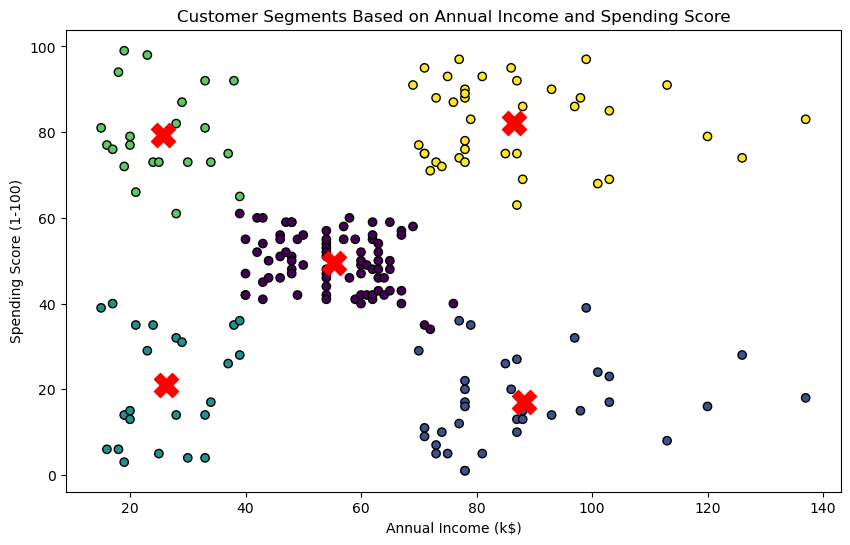

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.scatter(cluster_centers['Annual Income (k$)'], cluster_centers['Spending Score (1-100)'], s=300, c='red', marker='X')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

D:\softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


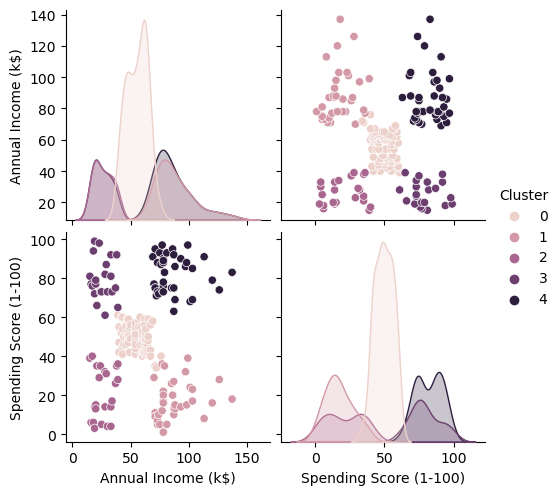

In [29]:
sns.pairplot(df, hue='Cluster', vars=['Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

4. Hierarchical Clustering for Customer Segmentation
Task: Implement hierarchical clustering on the Mall Customers dataset. Compare the clusters formed with those obtained from K-Means and discuss the differences.

Dendrogram

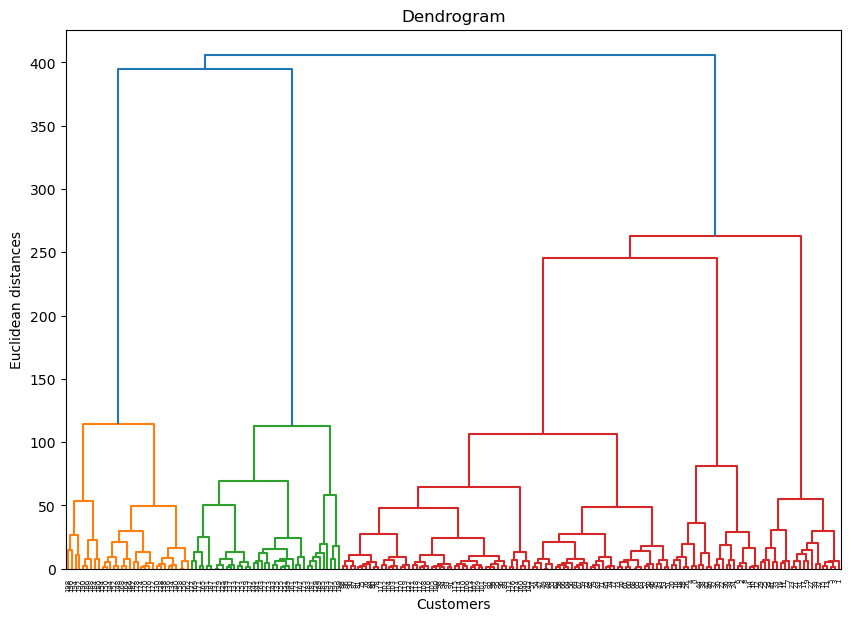

In [21]:
# Create the linkage matrix
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Implement Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
df['Cluster_HC'] = hc.fit_predict(X)

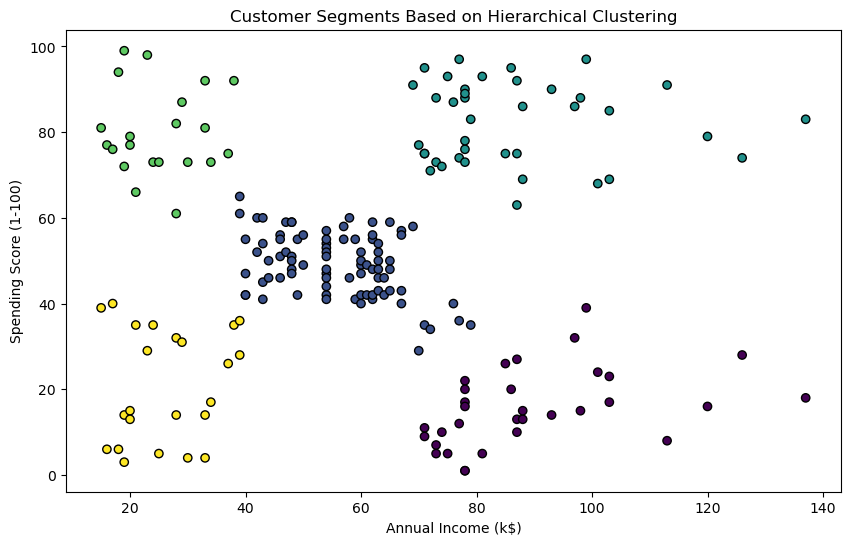

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster_HC'], cmap='viridis', marker='o', edgecolor='k')
plt.title('Customer Segments Based on Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

5. Visualizing Clusters with PCA
Task: Apply PCA to the Mall Customers dataset to reduce its dimensionality. Visualize the clusters from both K-Means and hierarchical clustering in the PCA-reduced space.


In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

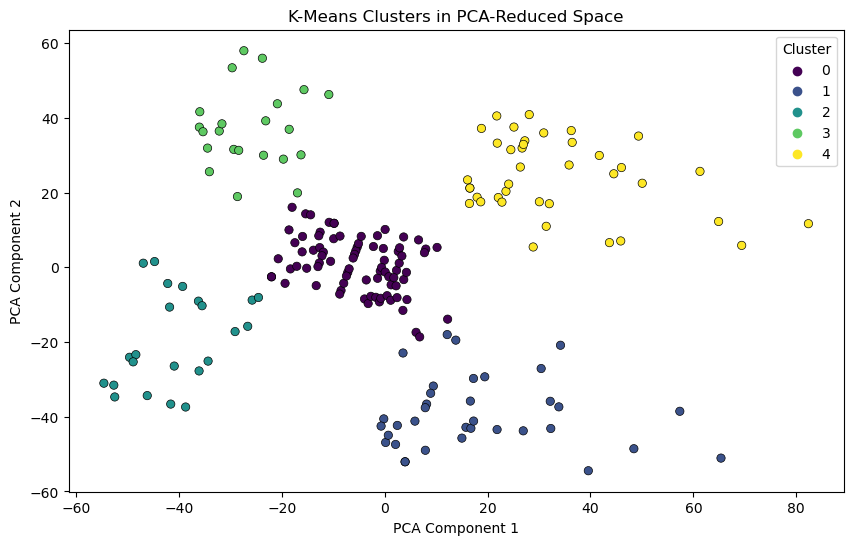

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clusters in PCA-Reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

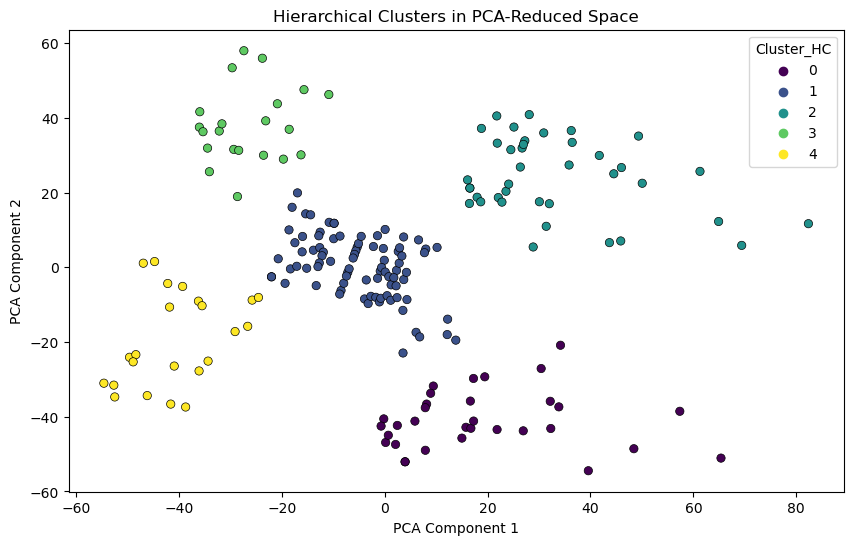

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster_HC'], palette='viridis', marker='o', edgecolor='k')
plt.title('Hierarchical Clusters in PCA-Reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()